# Bitcoin Price Prediction

### Importing Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

### importing datasets

In [3]:
df_test=pd.read_csv('BTC-USD.csv')

In [4]:
df=pd.read_csv('bitcoin_price_Training - Training.csv')

In [7]:
df.sample(5)

,Date,Open,High,Low,Close,Volume,Market Cap
1179,"May 09, 2014",440.18,452.69,440.14,449.46,"10,347,900","5,609,930,000"
1352,"Nov 17, 2013",440.96,500.58,440.24,492.11,-,"5,291,730,000"
1298,"Jan 10, 2014",846.69,871.19,822.60,868.48,"31,876,800","10,363,300,000"
922,"Jan 21, 2015",211.38,227.79,211.21,226.90,"29,924,600","2,905,520,000"
170,"Feb 11, 2017",988.90,1009.29,982.83,1004.45,"102,261,000","15,976,700,000"


In [8]:
df.shape

(1556, 7)

# Preprocessing

In [9]:
#No duplicated value
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [11]:
index=df['Volume']=='-'

In [12]:
df[index].shape

(243, 7)

In [13]:
for i in df.columns:
    print(i)
    print(df[(df[i]=='-')].shape)

Date
(0, 7)
Open
(0, 7)
High
(0, 7)
Low
(0, 7)
Close
(0, 7)
Volume
(243, 7)
Market Cap
(0, 7)


In [14]:
df.describe()

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


<h2> Handling Missing Values in Volume Column

In [16]:
df['Volume']=df['Volume'].str.split(',').str.join('')

In [17]:
df.loc[df['Volume'] == '-', 'Volume'] = None

In [18]:
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')
df['Volume'] = df['Volume'].interpolate(method='linear', limit_direction='both')

<h2>Feature Extraction

In [19]:
df['Date'] = pd.to_datetime(df['Date'])

In [20]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [21]:
df['Weekday'] = df['Date'].dt.weekday
df['WeekOfYear'] = df['Date'].dt.isocalendar().week
df['Quarter'] = df['Date'].dt.quarter
df['DayOfYear'] = df['Date'].dt.dayofyear
df['IsWeekend'] = df['Date'].dt.weekday >= 5
df['IsStartOfMonth'] = df['Date'].dt.is_month_start
df['IsEndOfMonth'] = df['Date'].dt.is_month_end

In [22]:
df.drop(columns=['Date'],inplace=True)

In [23]:
df

,Open,High,Low,Close,Volume,Market Cap,Year,Month,Day,Weekday,WeekOfYear,Quarter,DayOfYear,IsWeekend,IsStartOfMonth,IsEndOfMonth
0,2763.24,2889.62,2720.61,2875.34,8.605750e+08,"45,535,800,000",2017,7,31,0,31,3,212,False,False,True
1,2724.39,2758.53,2644.85,2757.18,7.059430e+08,"44,890,700,000",2017,7,30,6,30,3,211,True,False,False
2,2807.02,2808.76,2692.80,2726.45,8.037460e+08,"46,246,700,000",2017,7,29,5,30,3,210,True,False,False
3,2679.73,2897.45,2679.73,2809.01,1.380100e+09,"44,144,400,000",2017,7,28,4,30,3,209,False,False,False
4,2538.71,2693.32,2529.34,2671.78,7.891040e+08,"41,816,500,000",2017,7,27,3,30,3,208,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,116.38,125.60,92.28,105.21,4.686270e+07,"1,292,190,000",2013,5,2,3,18,2,122,False,False,False
1552,139.00,139.89,107.72,116.99,4.686270e+07,"1,542,820,000",2013,5,1,2,18,2,121,False,True,False
1553,144.00,146.93,134.05,139.00,4.686270e+07,"1,597,780,000",2013,4,30,1,18,2,120,False,False,True
1554,134.44,147.49,134.00,144.54,4.686270e+07,"1,491,160,000",2013,4,29,0,18,2,119,False,False,False


In [24]:
def conversion(i):
    if(i==True):
        return 1
    else:
        return 0
df.iloc[:, 13:17] = df.iloc[:, 13:17].replace({True: 1, False: 0})

In [25]:
df

,Open,High,Low,Close,Volume,Market Cap,Year,Month,Day,Weekday,WeekOfYear,Quarter,DayOfYear,IsWeekend,IsStartOfMonth,IsEndOfMonth
0,2763.24,2889.62,2720.61,2875.34,8.605750e+08,"45,535,800,000",2017,7,31,0,31,3,212,0,0,1
1,2724.39,2758.53,2644.85,2757.18,7.059430e+08,"44,890,700,000",2017,7,30,6,30,3,211,1,0,0
2,2807.02,2808.76,2692.80,2726.45,8.037460e+08,"46,246,700,000",2017,7,29,5,30,3,210,1,0,0
3,2679.73,2897.45,2679.73,2809.01,1.380100e+09,"44,144,400,000",2017,7,28,4,30,3,209,0,0,0
4,2538.71,2693.32,2529.34,2671.78,7.891040e+08,"41,816,500,000",2017,7,27,3,30,3,208,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,116.38,125.60,92.28,105.21,4.686270e+07,"1,292,190,000",2013,5,2,3,18,2,122,0,0,0
1552,139.00,139.89,107.72,116.99,4.686270e+07,"1,542,820,000",2013,5,1,2,18,2,121,0,1,0
1553,144.00,146.93,134.05,139.00,4.686270e+07,"1,597,780,000",2013,4,30,1,18,2,120,0,0,1
1554,134.44,147.49,134.00,144.54,4.686270e+07,"1,491,160,000",2013,4,29,0,18,2,119,0,0,0


In [26]:
df['Market Cap']=df['Market Cap'].str.split(',').str.join('')

In [27]:
df['Market Cap']=df['Market Cap'].astype(int)

# EDA

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            1556 non-null   float64
 1   High            1556 non-null   float64
 2   Low             1556 non-null   float64
 3   Close           1556 non-null   float64
 4   Volume          1556 non-null   float64
 5   Market Cap      1556 non-null   int64  
 6   Year            1556 non-null   int64  
 7   Month           1556 non-null   int64  
 8   Day             1556 non-null   int64  
 9   Weekday         1556 non-null   int64  
 10  WeekOfYear      1556 non-null   UInt32 
 11  Quarter         1556 non-null   int64  
 12  DayOfYear       1556 non-null   int64  
 13  IsWeekend       1556 non-null   int64  
 14  IsStartOfMonth  1556 non-null   int64  
 15  IsEndOfMonth    1556 non-null   int64  
dtypes: UInt32(1), float64(5), int64(10)
memory usage: 190.1 KB


/Users/shahidali/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Text(0.5, 1.0, 'Bitcoin Valuation')

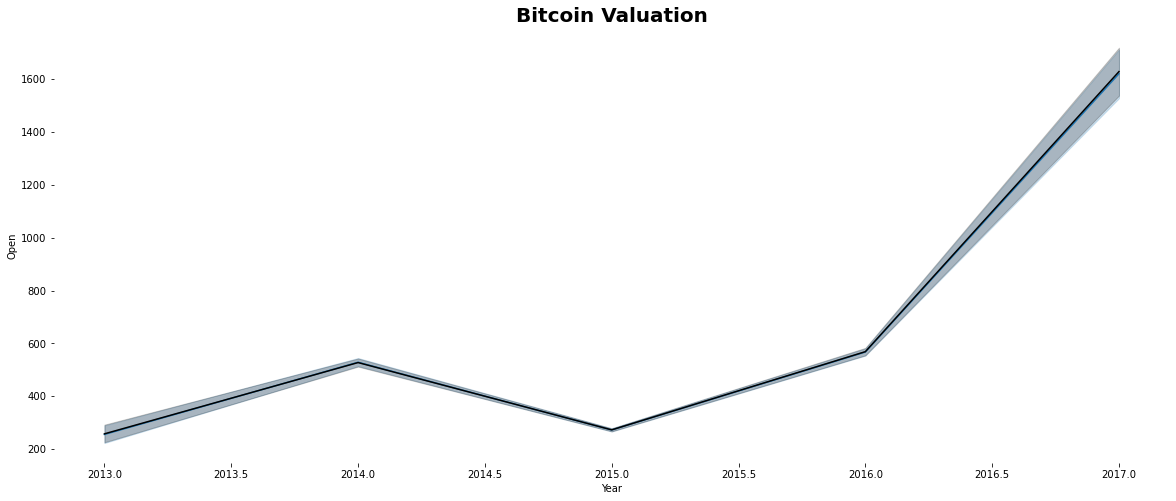

In [29]:
#importing ploting libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
colors = ['#FF9900','#000000']
fig=plt.figure(figsize=(20,8))
ax=sns.lineplot(data=df, x='Year',y='Open')
ax=sns.lineplot(data=df, x='Year',y='Close', color=colors[1]);
for s in ['left','right','top','bottom']:
    ax.spines[s].set_visible(False)

plt.title("Bitcoin Valuation", size=20, weight='bold')

<h3>1.Values increase drastically after 2016

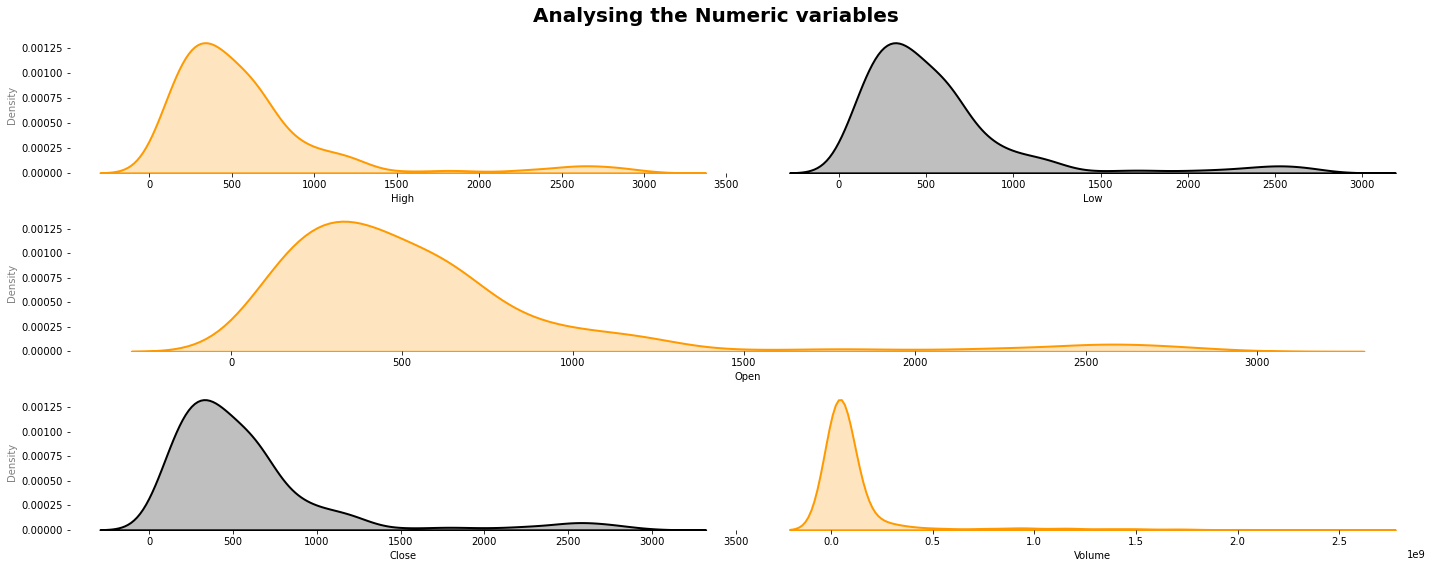

In [30]:
#integer columns
fig=plt.figure(figsize=(20,8), tight_layout=True)
plt.suptitle("Analysing the Numeric variables", size=20, weight='bold')
ax=fig.subplot_mosaic("""AB
                         CC
                         DE""")
sns.kdeplot(df['High'], ax=ax['A'], color=colors[0], fill=True, linewidth=2)
sns.kdeplot(df['Low'], ax=ax['B'], color=colors[1],fill=True, linewidth=2)
sns.kdeplot(df['Open'], ax=ax['C'], color=colors[0],fill=True, linewidth=2)
sns.kdeplot(df['Close'], ax=ax['D'], color=colors[1],fill=True, linewidth=2)
sns.kdeplot(df['Volume'], ax=ax['E'], color=colors[0],fill=True, linewidth=2)
ax['B'].yaxis.set_visible(False)
ax['E'].yaxis.set_visible(False)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['D'].yaxis.label.set_alpha(0.5)
for s in ['left','right','top','bottom']:
    ax['A'].spines[s].set_visible(False)
    ax['B'].spines[s].set_visible(False)
    ax['C'].spines[s].set_visible(False)
    ax['D'].spines[s].set_visible(False)
    ax['E'].spines[s].set_visible(False)

<h2> Check Corelation

<AxesSubplot:>

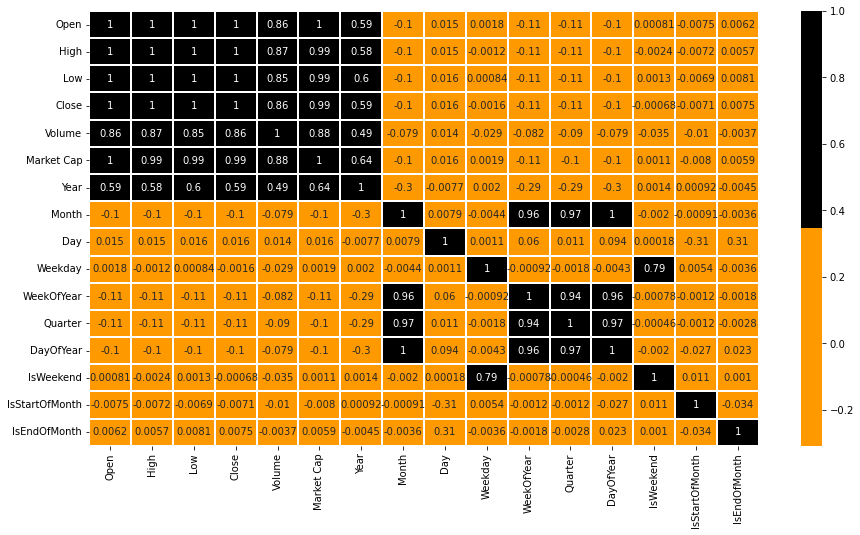

In [31]:
fig=plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap=[colors[0],colors[1]], linecolor='white', linewidth=2 )

<h2>Check Normality

In [73]:
from scipy.stats import levene, shapiro
int_cols=df.select_dtypes(exclude='object').columns.to_list()

for i in int_cols:
    _, p_value=shapiro(df[i])
    if p_value<0.05:
        print("")

        print("Feature {} is normaly distributed".format(i))
    else:
        print("Feature {} is not normaly distributed".format(i))

        
    print("Normalitiy test p_value for featue -  {} is {}".format(i,np.round(p_value,3)))


Feature Open is normaly distributed
Normalitiy test p_value for featue -  Open is 0.0

Feature High is normaly distributed
Normalitiy test p_value for featue -  High is 0.0

Feature Low is normaly distributed
Normalitiy test p_value for featue -  Low is 0.0

Feature Close is normaly distributed
Normalitiy test p_value for featue -  Close is 0.0

Feature Volume is normaly distributed
Normalitiy test p_value for featue -  Volume is 0.0

Feature Market Cap is normaly distributed
Normalitiy test p_value for featue -  Market Cap is 0.0

Feature Year is normaly distributed
Normalitiy test p_value for featue -  Year is 0.0

Feature Month is normaly distributed
Normalitiy test p_value for featue -  Month is 0.0

Feature Day is normaly distributed
Normalitiy test p_value for featue -  Day is 0.0

Feature Weekday is normaly distributed
Normalitiy test p_value for featue -  Weekday is 0.0

Feature WeekOfYear is normaly distributed
Normalitiy test p_value for featue -  WeekOfYear is 0.0

Feature 

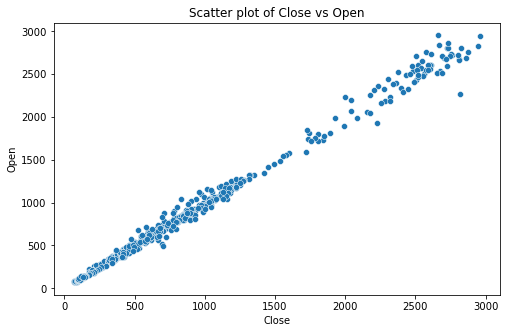

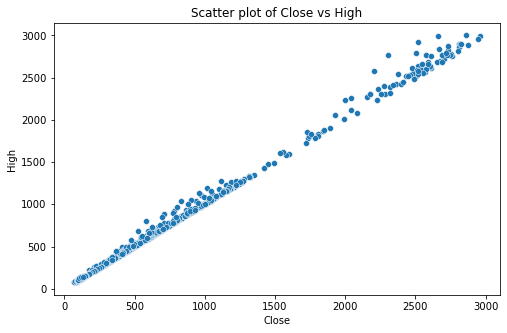

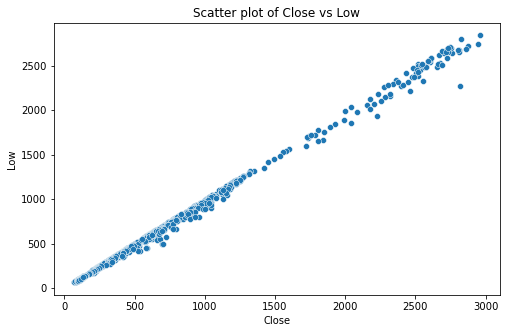

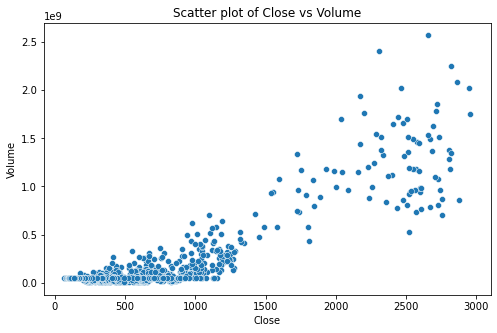

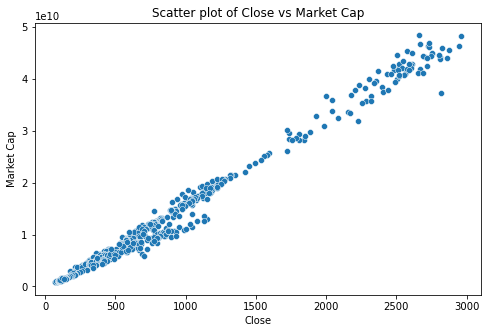

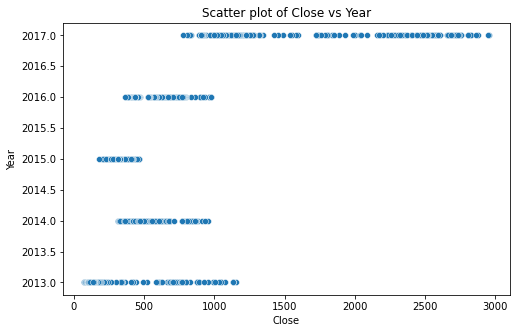

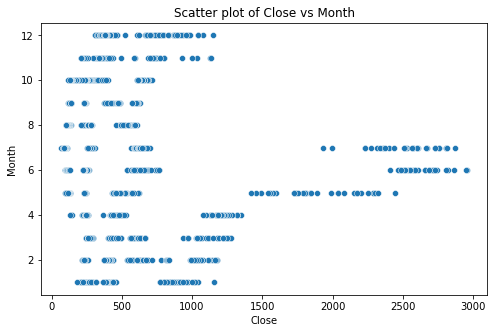

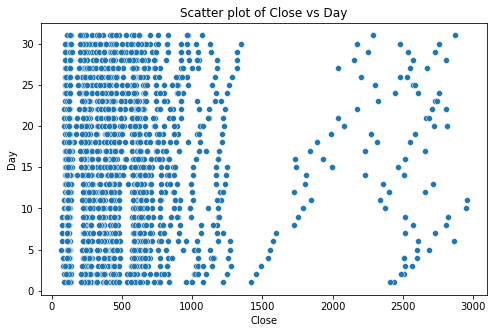

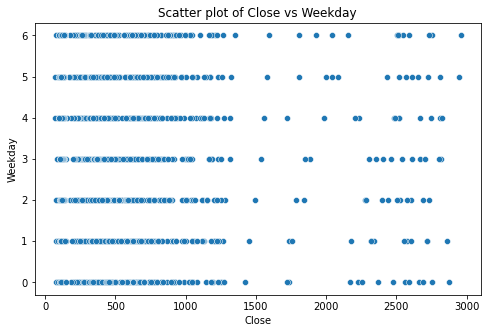

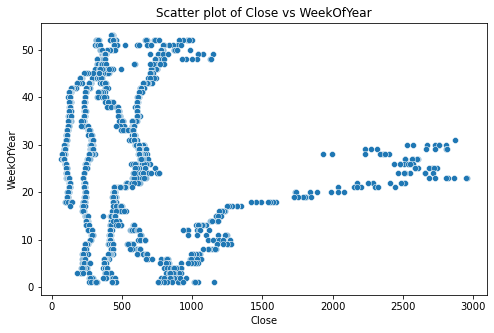

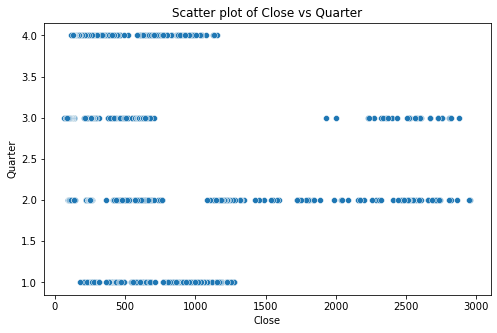

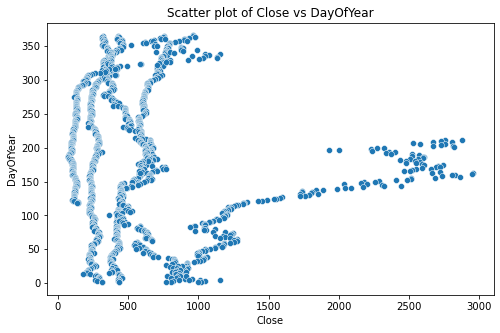

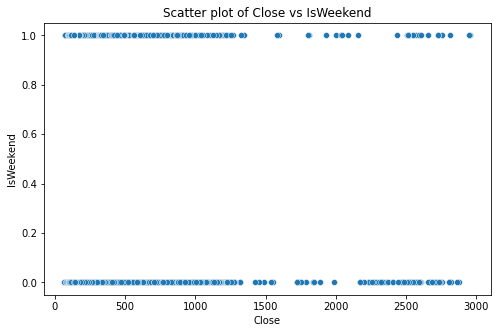

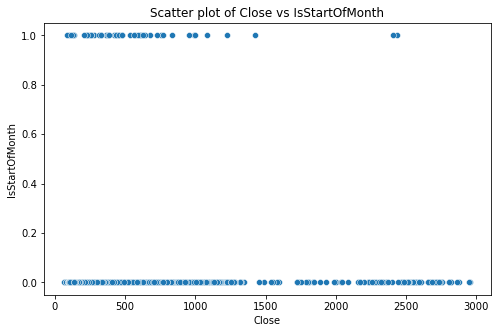

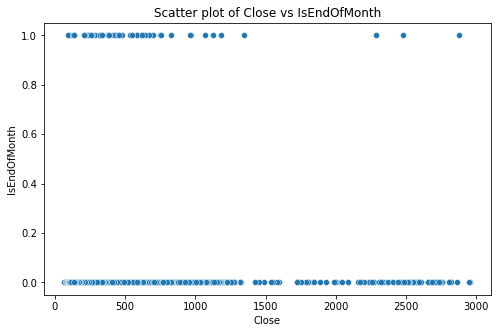

In [33]:
for column in df.columns:
    if column != 'Close':
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x='Close', y=column, data=df)
        plt.xlabel('Close')
        plt.ylabel(column)
        plt.title(f'Scatter plot of Close vs {column}')
        plt.show()


In [34]:
df.sample(4)

,Open,High,Low,Close,Volume,Market Cap,Year,Month,Day,Weekday,WeekOfYear,Quarter,DayOfYear,IsWeekend,IsStartOfMonth,IsEndOfMonth
756,271.11,277.42,267.60,269.03,49154800.0,3890430000,2015,7,6,0,28,3,187,0,0,0
308,600.81,608.14,600.35,608.04,59153800.0,9545830000,2016,9,26,0,39,3,270,0,0,0
1301,946.49,965.74,802.00,802.00,81311700.0,11571400000,2014,1,7,1,2,1,7,0,0,0
1204,414.83,469.75,407.37,458.79,50730200.0,5244350000,2014,4,14,0,16,2,104,0,0,0


# Train Test Split

In [35]:
X=df.drop(columns=['Close'])
y=df['Close']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=False, random_state=42)

# Scaling

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)

In [38]:
X_test=scaler.transform(X_test)

# Modeling

<h2> Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import set_config
model = LinearRegression()
model.fit(X_train,y_train)
set_config(display='diagram')
pred=model.predict(X_test)
sc=np.round(model.score(X_test, y_test),2) * 100
r2=np.round(r2_score(y_test,pred),2)
mse=np.round(mean_squared_error(y_test,pred),2)
mae=np.round(mean_squared_error(y_test,pred),2)

Text(0.5, 1.0, 'Compare test and predicted values')

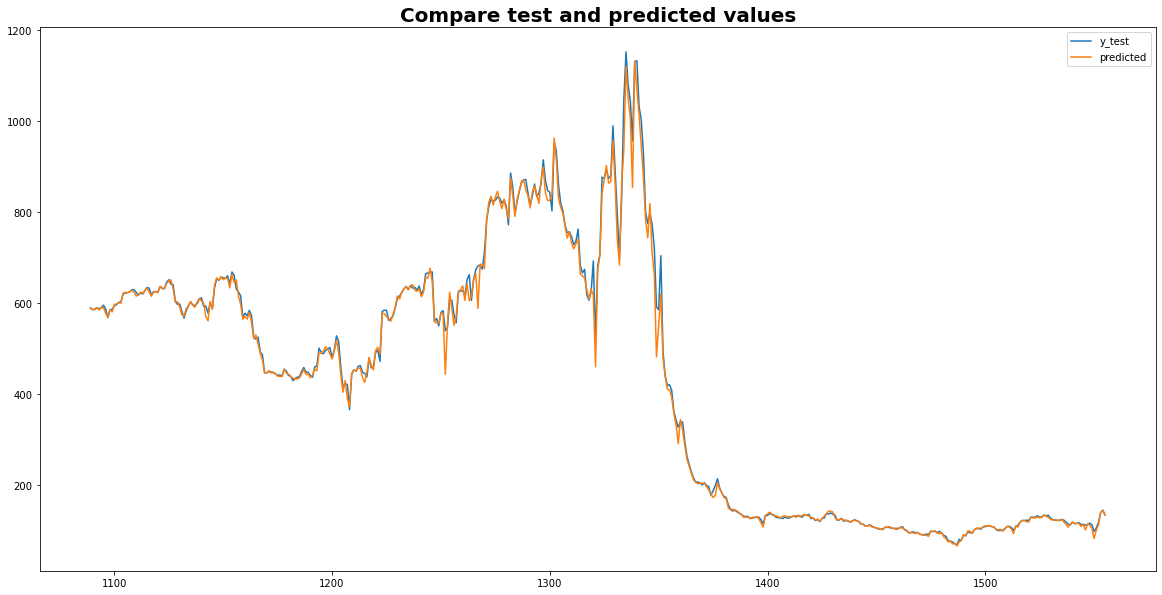

In [40]:
fig = plt.figure(figsize=(20, 10))  # Adjust the figsize as needed
p = pd.Series(pred, index=y_test.index)
plt.plot(y_test)
plt.plot(p)
plt.legend(['y_test', 'predicted'])
plt.title("Compare test and predicted values", size=20, weight='bold')

# Using LSTM,GRU

In [41]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))

In [42]:
X=df[['Open']]
y=df['Close']
length=100
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=False, random_state=42)
training_set = X.iloc[:1000].values
test_set = X.iloc[1000:].values
# Feature Scaling

training_set_scaled = sc.fit_transform(training_set)
test_set_scaled=sc.transform(test_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(length, len(training_set)):
    X_train.append(training_set_scaled[i-length:i, 0])
    y_train.append(training_set_scaled[i, 0])

#The input data (X_train and X_test) is reshaped to fit the input shape expected by the LSTM model. LSTM expects input data in 3D shape (samples, time steps, features).
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test = []
y_test = []
for i in range(length, len(test_set)):
    X_test.append(test_set_scaled[i-length:i, 0])
    y_test.append(test_set_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

(900, 100)


In [43]:
X_train.shape

(900, 100, 1)

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
model=Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history=model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs = 50, batch_size = 32)

2024-03-31 14:35:54.251356: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/shahidali/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 164ms/step - loss: 0.0064 - val_loss: 0.0020
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - loss: 7.9788e-04 - val_loss: 0.0019
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - loss: 6.1278e-04 - val_loss: 0.0018
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - loss: 6.2542e-04 - val_loss: 0.0019
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - loss: 6.5705e-04 - val_loss: 0.0017
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - loss: 6.2043e-04 - val_loss: 0.0018
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - loss: 7.3895e-04 - val_loss: 0.0017
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - loss: 5.9778e-04 - val_loss: 0.0015
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - loss: 6.0694e-04 - val_loss: 0.0014
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step - loss: 6.3185e-04 - val_loss: 0.0014
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - loss: 5.2467e-04 - val_loss: 0.0014
Epoch 12/50

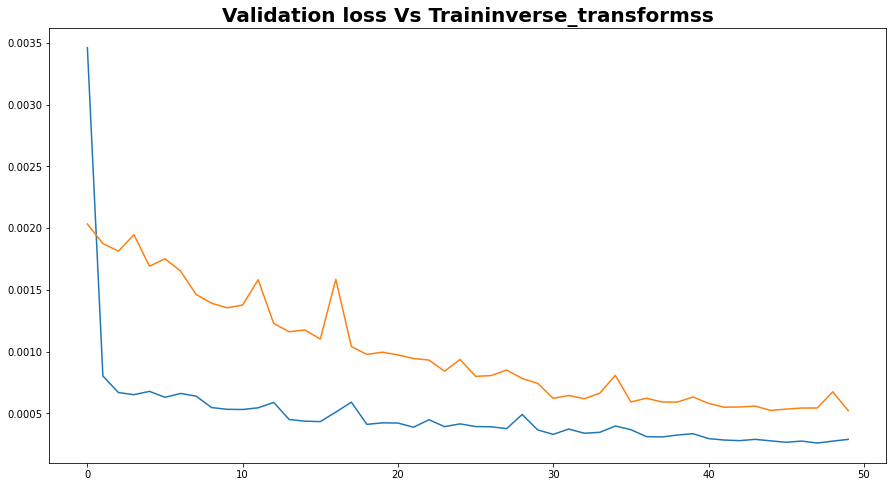

In [45]:
loss = pd.DataFrame(model.history.history)
fig=plt.figure(figsize=(15,8))
plt.title("Validation loss Vs Traininverse_transformss", size=20, weight='bold')
plt.plot(loss)

In [46]:
df_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [47]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2747 non-null   object 
 1   Open       2747 non-null   float64
 2   High       2747 non-null   float64
 3   Low        2747 non-null   float64
 4   Close      2747 non-null   float64
 5   Adj Close  2747 non-null   float64
 6   Volume     2747 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 150.4+ KB


In [48]:
sc = MinMaxScaler(feature_range = (0, 1))
X_t=df_test[['Open']]
y_t=df_test['Close']
test = X_t.iloc[:100].values
test_scaled=sc.fit_transform(test)

In [49]:
test.shape

(100, 1)

In [50]:
new_val=test_scaled[:, 0]

In [51]:

# Reshape based on your model's input shape (replace 1 with actual feature number)
new_sequence_reshaped = np.reshape(new_val, (1, 100, 1))  

predicted_price = model.predict(new_sequence_reshaped)
ans=predicted_price[0][0]
print("Next Day Opening price:", predicted_price[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step
Next Day Opening price: 0.0950426


In [52]:
y_pred=sc.inverse_transform(ans.reshape(-1,1))[0][0]

In [53]:
y_pred

325.88065

In [54]:
#Actual
y_true=df_test.iloc[99,-6]

In [55]:
y_true

322.286011

### Actual Opening Price


In [56]:
print("Actual opening price is ",y_true)

Actual opening price is  322.286011


### Predicted Opening Price 

In [57]:
print("Predicted opening price is ",y_pred)

Predicted opening price is  325.88065


In [58]:
difference = y_pred-y_true

In [59]:
difference

3.5946347519531514

In [68]:
if y_pred==y_true:
    print("Buying a particular stock is helpful")
    
elif y_pred>y_true:
    print("Buying a particular stock is not helpful because Predicted Price is Higher than Actual Price and the\nDifference between the  Predicted Price and actual Price is :",difference)

    
    
elif y_pred<y_true:
    print("Buying a particular stock is not helpful because Predicted Price is Lower than Actual Price and the Difference between Predicted Price and actual Price is :",difference)

    
    
else:
    print("Buying a particular stock is not helpful")

Buying a particular stock is not helpful because Predicted Price is Higher than Actual Price and the
Difference between the  Predicted Price and actual Price is : 3.5946347519531514
